In [3]:
#Decision Tree linrary
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import datasets
import numpy as np
import pandas as pd

In [19]:
#random database
data = datasets.load_diabetes()
df = pd.DataFrame(data['data'],columns = data['feature_names'])
df['target'] = data['target']


In [51]:
#split
def sechange(x):
    if x>0:
        return 1
    else :
        return 0
df['sex'] = df.apply(lambda row: sechange(row['sex']), axis = 1)
train_size = 0.9 
train = df.sample(frac = train_size)
test = df.drop(train.index)

train_x = train.drop(columns='sex')
train_y = train[['sex']]
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,1,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,0,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,1,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,0,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,0,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


[Text(167.4, 190.26, 'X[5] <= -0.019\ngini = 0.497\nsamples = 398\nvalue = [215, 183]'),
 Text(83.7, 135.9, 'X[2] <= -0.015\ngini = 0.427\nsamples = 149\nvalue = [46, 103]'),
 Text(41.85, 81.53999999999999, 'X[9] <= 179.0\ngini = 0.5\nsamples = 51\nvalue = [26, 25]'),
 Text(20.925, 27.180000000000007, '\n  (...)  \n'),
 Text(62.775000000000006, 27.180000000000007, '\n  (...)  \n'),
 Text(125.55000000000001, 81.53999999999999, 'X[7] <= 0.038\ngini = 0.325\nsamples = 98\nvalue = [20, 78]'),
 Text(104.625, 27.180000000000007, '\n  (...)  \n'),
 Text(146.475, 27.180000000000007, '\n  (...)  \n'),
 Text(251.10000000000002, 135.9, 'X[5] <= 0.043\ngini = 0.436\nsamples = 249\nvalue = [169, 80]'),
 Text(209.25, 81.53999999999999, 'X[2] <= -0.025\ngini = 0.478\nsamples = 180\nvalue = [109, 71]'),
 Text(188.32500000000002, 27.180000000000007, '\n  (...)  \n'),
 Text(230.175, 27.180000000000007, '\n  (...)  \n'),
 Text(292.95, 81.53999999999999, 'X[7] <= -0.084\ngini = 0.227\nsamples = 69\nvalue 

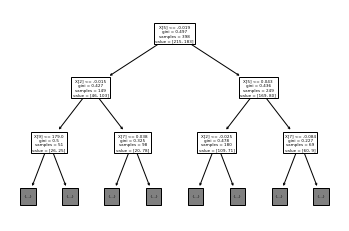

In [59]:
# build classifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier()
clf.fit(train_x,train_y)
pre = clf.predict(test.drop(columns = 'sex'))
accuracy_score(pre,test['sex'])
tree.plot_tree(clf,max_depth=2)